## 학습정리
### 8장. 경사 하강법 

#### 8.1 경사 하강법에 숨은 의미
* 가장 적합한 모델 찾기 : 최적화 문제에 대한 답
    * 모델의 오류(error)를 최소화 
    * 가능도(likelihood)를 최대화
* 그래디언트 (gradient) : 편미분 벡터 
    * 함수가 가장 빠르게 증가할 수 있는 방향을 나타낸다.
    * 전역 최솟값이 하나만 존재할 때 유용
    * 임의의 시작점을 잡은 후, 그래디언트를 계산, 그래디언트의 방향(함수의 출력 값이 가장 많이 증가하는 방향)으로 조금 이동하는 과정을 여러번 반복
    
#### 8.2 그래디언트 계산하기
* f가 단변수 함수일때 : x에서의 미분값은 x가 아주 조금 변했을 때 f(x)의 변화량을 의미
    * x의 변화량 = h 
    * h가 0에 점근하게 할때 미분값 : 함수변화율(diffrence quotient)의 극한값
    * 도함수(derivative)를 구할 수 없는 경우 : 아주 작은 e값을 대입해 미분값을 어림잡음

* f가 다변수 함수 : 입력 변수 중 하나에 작은 변화가 있을 때 f(x)의 변화량을 알려주는 편도함수가 여러개 존재
    * i 번째 편도함수 : i 번째 변수를 제외한 다른 모든 입력 변수를 고정시켜서 계산할 수 있다
    
#### 8.3 그래디언트 적용하기
* 임의의 시작점을 잡고, 그래디언트가 아주 작아질 때까지 경사의 반대 방향으로 조금씩 이동

#### 8.4 적절한 이동 거리 정하기
* 경사를 이동할때 이동거리(step size) 정하는 법
    1. 이동거리를 고정
        * 간편 
    2. 시간에 따라 이동거리를 점차 줄임
    3. 이동할 때마다 목적 함수를 최소화하는 이동 거리로 정함
        * 계산 비용이 너무 큼
    * 이동거리가 너무 짧으면 경사 하강법을 수행하는데 오래 걸림
    * 이동거리가 너무 길면 최적화하려는 함수가 너무 커지거나 더이상 유효하지 않을 수 있음
    * 적절한 이동거리를 찾기 위해서 여러값으로 실험해야함

#### 8.5 경사 하강법으로 모델 학습
* 경사 하강법으로 데이터에 적합한 모델의 파라미터를 구할 수 있다
* 데이터 셋과 (미분 가능한)하나 이상의 파라미터로 구성된 모델이 주어질 때
    * 손실 함수(loss function)을 통해 모델이 얼마나 주어진 데이터에 적합한지 계산
    * 주어진 데이터가 더 이상 변하지 않을 때 
        * $\to$ 손실 함수 : 모델의 파라미터가 얼마나 좋고 나쁜지 알려줌
        * 손실을 최소화 하는 모델의 파라미터를 구함

    * 그래디언트의 의미 : 특정 x의 예측값이 너무 크다면 오차는 양수 
        * 2*error : 양수, 절편이 조금이라도 커지면 예측값과 오차의 제곱을 더욱 크게 만듬
        * 2 * error * x : x와 동일한 기호. 
            * x가 양수 : 경사가 커지면 예측값과 오차가 증가
            * x가 음수 : 경사가 커지면 예측값과 오차 감소
            
* 전체 데이터셋에서 평균제곱오차(mean squared error) 계산
    * mse의 그래디언트는 각 데이터 포인트에서 계산된 그래디언트의 평균
    * 경사하강법 적용
        1. 임의의 theta로 시작
        2. 모든 그래디언트의 평균을 계산
        3. theta를 2번에서 계산된 값으로 변경
        4. 반복
   * 전체 데이터 셋을 한 번 훑어본다는 의미의 epoch을 여러번 수행 $\to$ 올바른 경사와 절편이 학습됨
   
#### 8.6 미니 배치와 SGD(Stochastic Gradient Descent)
* 경사 하강법의 단점 : 데이터셋 전체의 그래디언트를 모두 구해야 이동거리 만큼 파라미터를 업데이트 할 수 있음
* 큰 데이터 셋으로 모델을 학습하는 경우, 그래디언트 계산은 굉장히 오래 걸림
    * 미니 배치 경사 하강법 : 전체 데이터 셋의 샘플인 미니 배치에서 그래디언트를 계산
        * 미니배치 경사 하강법은 더 오래 걸림
    * SGD(stochastic gradient descent) : 각 epoch마다 단 하나의 데이터 포인트에서 그래디언트를 계산
        * 특정 데이터 포인트의 그래디언트와 데이터셋 전체의 그래디언트의 방향이 서로 상반될 수도 있음
    * 배치를 벡터화해서 그래디언트를 계산하는 것이 에폭별로 각 데이터 포인트의 그래디언트를 하는 것보다 빠름

#### 8.7 더 공부해 보고 싶다면
* Active Calculus
* Sebastian Ruder 블로그

## code

In [6]:
from typing import List

Vector = List[float]

In [4]:
# 8.1 example 함수의 최대값 또는 최소값을 찾으려면? 

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    
def sum_of_squares(v:Vector) -> float :
    """v에 속해 있는 항목들의 제곱합을 계산한다."""
    return dot(v,v)


In [5]:
from typing import Callable
# 함수의 변화율 
def difference_quotient(f: Callable[[float],float],
                       x : float,
                       h : float) -> float :
    return (f(x + h) - f(x)) / h

In [6]:
# 도함수를 구할 수 있는 경우 
# 제곱함수
def square(x:float)->float :
    return x*x

# 제곱함수의 도함수
def derivative(x:float)-> float :
    return 2*x

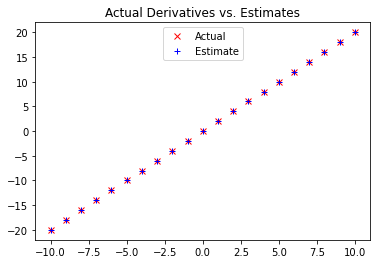

In [7]:
# 도함수(derivative)를 구할 수 없는 경우 : 아주 작은 e값을 대입해 미분값을 어림잡음

xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs] # x(-10,10)에서 h =0.001일때 x에 대한 square함수의 변화율

# 두 계산식의 결괏값이 거의 비슷함을 보여주기 위한 그래프
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx' , label = 'Actual')
plt.plot(xs, estimates, 'b+' , label = 'Estimate')
plt.legend(loc=9)
plt.show()


In [8]:
from typing import Callable

def partial_difference_quotient(f: Callable[[Vector],float],
                               v : Vector,
                               i : int,
                               h : float ) -> float :
    """함수 f의 i번째 편도함수가 v에서 가지는 값"""
    w = [v_j + (h if j == i else 0) for j,v_j in enumerate(v)] # j번째가 아니면 0 
    
    return (f(w) - f(v)) / h

In [9]:
# 도함수와 마찬가지로 그래디언트의 근사값을 구함
def estimate_gradient(f: Callable[[Vector], float],
                     v: Vector,
                     h: float = 0.0001):
    return [partial_difference_quotient(f,v,i,h)
           for i in range(len(v))]


In [7]:
# linear_algebra함수 
import random

def squared_distance(v: Vector, w: Vector) -> float :
    """(v_1 - w_1) ** 2 +...+ (v_n - w_n) ** 2 """
    return sum_of_squares(subtract(v,w))

def distance(v: Vector, w: Vector) -> float :
    """벡터 v와 w간의 거리를 계산"""
    return math.sqrt(squared_distance(v,w))

def add(a,b) : return a + b
def add(v: Vector, w: Vector) -> Vector :
    """각 성분끼리 더함"""
    assert len(v) == len(w), "vectors must be the same length" # v,w의 길이가 같아야 함
    return [v_i + w_i for v_i,w_i in zip(v,w)]

def scalar_multiply(c:float, v: Vector)-> Vector :
    """모든 성분을 c로 곱하기"""
    return [c*v_i for v_i in v]

In [1]:
c = 2
v = [1,2,3,4]
c*v
[c*v_i for v_i in v]

[2, 4, 6, 8]

In [8]:
import numpy as np
np.dot(c,v).tolist()

[2, 4, 6, 8]

In [7]:
import numpy as np

In [8]:
np.dot(c,v)

array([2, 4, 6, 8])

In [11]:
# sum_of_squares는 v가 0 벡터일 때 가장 작은 값을 가진다. 모른다고 가정하고 그래디언트 적용
def gradient_step(v: Vector, gradient: Vector, step_size : float) -> Vector :
    """v에서 step_size만큼 이동하기"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v : Vector) -> Vector : 
    return [2*v_i for v_i in v]


In [13]:
# 임의의 시작점을 선택
v = [random.uniform(-10,10) for i in range(3)] 

for epoch in range(100):
    grad = sum_of_squares_gradient(v) # v의 그래디언트 계산
    v = gradient_step(v, grad, -0.01) # 그래디언트의 -0.01만큼 이동
    print(epoch, v)

assert distance(v, [0,0,0]) < 0.001
# [0,0,0]에 아주 가깝게 수렴

0 [8.772581380542729, 5.610903992569277, 9.879746313572554, -1.7545162761085458, -1.1221807985138554, -1.9759492627145108]
1 [8.772581380542729, 5.610903992569277, 9.879746313572554, -1.7545162761085458, -1.1221807985138554, -1.9759492627145108, -1.7545162761085458, -1.1221807985138554, -1.9759492627145108, 0.3509032552217092, 0.2244361597027711, 0.3951898525429022]
2 [8.772581380542729, 5.610903992569277, 9.879746313572554, -1.7545162761085458, -1.1221807985138554, -1.9759492627145108, -1.7545162761085458, -1.1221807985138554, -1.9759492627145108, 0.3509032552217092, 0.2244361597027711, 0.3951898525429022, -1.7545162761085458, -1.1221807985138554, -1.9759492627145108, 0.3509032552217092, 0.2244361597027711, 0.3951898525429022, 0.3509032552217092, 0.2244361597027711, 0.3951898525429022, -0.07018065104434183, -0.04488723194055422, -0.07903797050858044]
3 [8.772581380542729, 5.610903992569277, 9.879746313572554, -1.7545162761085458, -1.1221807985138554, -1.9759492627145108, -1.7545162761

NameError: name 'math' is not defined

In [12]:
# 손실을 최소화 하는 모델의 파라미터를 구함
# x는 -50~49 사이의 값, y는 항상 20*x + 5
inputs = [(x, 20*x + 5) for x in range(-50,50)]

In [13]:
inputs 

[(-50, -995),
 (-49, -975),
 (-48, -955),
 (-47, -935),
 (-46, -915),
 (-45, -895),
 (-44, -875),
 (-43, -855),
 (-42, -835),
 (-41, -815),
 (-40, -795),
 (-39, -775),
 (-38, -755),
 (-37, -735),
 (-36, -715),
 (-35, -695),
 (-34, -675),
 (-33, -655),
 (-32, -635),
 (-31, -615),
 (-30, -595),
 (-29, -575),
 (-28, -555),
 (-27, -535),
 (-26, -515),
 (-25, -495),
 (-24, -475),
 (-23, -455),
 (-22, -435),
 (-21, -415),
 (-20, -395),
 (-19, -375),
 (-18, -355),
 (-17, -335),
 (-16, -315),
 (-15, -295),
 (-14, -275),
 (-13, -255),
 (-12, -235),
 (-11, -215),
 (-10, -195),
 (-9, -175),
 (-8, -155),
 (-7, -135),
 (-6, -115),
 (-5, -95),
 (-4, -75),
 (-3, -55),
 (-2, -35),
 (-1, -15),
 (0, 5),
 (1, 25),
 (2, 45),
 (3, 65),
 (4, 85),
 (5, 105),
 (6, 125),
 (7, 145),
 (8, 165),
 (9, 185),
 (10, 205),
 (11, 225),
 (12, 245),
 (13, 265),
 (14, 285),
 (15, 305),
 (16, 325),
 (17, 345),
 (18, 365),
 (19, 385),
 (20, 405),
 (21, 425),
 (22, 445),
 (23, 465),
 (24, 485),
 (25, 505),
 (26, 525),
 (27, 

In [14]:
# 경사하강법 : 평균제곱 오차를 최소화 -> 경사,절편 구하기
# 한 개의 데이터 포인트에서 오차의 그래디언트를 계산해 주는 함수
def linear_gradient(x: float, y:float, theta:Vector)-> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error**2
    grad = [2*error*x,2*error]           
    return grad

In [17]:
# chapter4
def vector_mean(vectors: List[Vector])-> Vector:
    """각 성분별 평균을 계산"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors)) # 모든 성분에 1/벡터길이 곱하기

def vector_sum(vectors : List[Vector]) -> Vector :
    """모든 벡터의 각 성분들 끼리 더함"""
    # vectors가 비어있는지 확인
    assert vectors, "no vectors provided!"
    
    # 모든 벡터의 길이가 동일한지 확인 
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "diffrent sizes!" #첫 번째 벡터의 길이와 나머지 길이들을 비교
    
    # i번째 결괏값은 모든 벡터의 i번째 성분을 더한 값
    return [sum(vector[i] for vector in vectors)
           for i in range(num_elements)]


In [20]:
# 임의의 경사와 절편으로 시작
theta = [random.uniform(-1,1), random.uniform(-1,1)]

learning_rate = 0.001

for epoch in range(5000) :
    # 모든 그래디언트의 평균 계산
    grad = vector_mean([linear_gradient(x, y, theta) for x,y in inputs])
    # 그래디언트 만큼 이동
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1 , "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


0 [0.5090830401121647, -0.05519664269709712, 32.486303375490316, -0.009380523674493725]


ValueError: too many values to unpack (expected 2)

In [24]:
from typing import TypeVar, List, Iterator
T = TypeVar('T') # 변수의 타입과 무관한 함수 생성

def minibatches(dataset : List[T],
           batch_size : int,
           shuffle: bool = True) -> Iterator[List[T]] :
    """dataset에서 batch_size만큼 데이터 포인트를 샘플링해서 미니배치를 생성"""
    # 각 미니배치의 시작점인 0, batch_size, 2 * batch_size, ...을 나열
    
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle : random.shuffle(batch_starts) # 미니배치의 순서를 섞는다.
    
    for start in batch_starts :
        end = start + batch_size
        yield dataset[start:end]

In [25]:
# 미니배치로 풀어보기 
theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20) :
        grad = vector_mean([linear_gradient(x,y,theta) for x,y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch,theta)

slope, intercept = theta
assert 19.9 < slope < 20.1 , "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


ValueError: too many values to unpack (expected 2)

In [26]:
#SGD

theta = [random.uniform(-1,1), random.uniform(-1,1)]

for epoch in range(1000) :
    for x,y in inputs :
        grad = linear_gradient(x,y,theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1 , "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


ValueError: too many values to unpack (expected 2)